In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

c:\Users\lazar\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bismasajjad/global-ai-job-market-and-salary-trends-2025",
  'ai_job_dataset.csv'
)

C:\Users\lazar\AppData\Local\Temp\ipykernel_7792\3783397052.py:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [3]:
df_cleaned = df.dropna()

In [4]:
filter = df_cleaned['company_location'] == 'United States'
df_filtered = df_cleaned[filter]
df_filtered = df_filtered[['experience_level', 'years_experience', 'salary_usd']]

In [5]:
custom_order = ['EN', 'MI', 'SE', 'EX']
df_filtered['experience_level'] = pd.Categorical(df_filtered['experience_level'], categories=custom_order, ordered=True)
df_sorted = df_filtered.sort_values(by='experience_level').reset_index(drop=True)

In [6]:
df_sorted['experience_level'] = OrdinalEncoder().fit_transform(df_sorted[['experience_level']])

<Axes: >

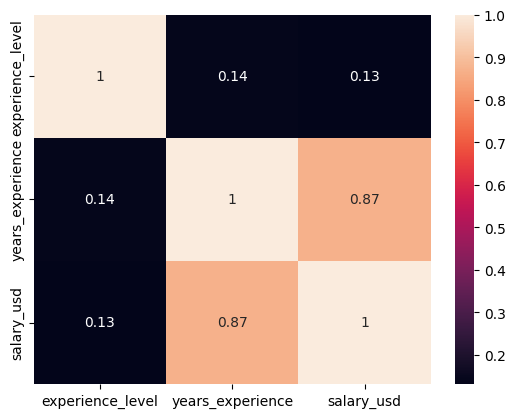

In [ ]:
my_corr = df_sorted.corr(method='pearson')
sns.heatmap(my_corr, annot=True)